Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print("Transactions:   ", transactions.shape)
transactions.head()

Transactions:    (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
print("Items:          ", items.shape)
items.head()

Items:           (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
print("Item_categories:", item_categories.shape)
item_categories.head()

Item_categories: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
print("Shops:          ", shops.shape)
shops.head()

Shops:           (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [85]:
# Split date
transactions2 = pd.concat([transactions, transactions.date.str.split('.', expand = True)], axis=1)
transactions2.drop(columns=['date'], inplace=True)
transactions2.rename(columns={0:'day', 1:'month', 2:'year'}, inplace=True)
# Filter by date
transactions2 = transactions2[(transactions2.year == '2014') & (transactions2.month == '09')]
transactions2.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1953691,20,5,1039,899.0,1.0,24,09,2014
1953692,20,5,1015,449.0,1.0,27,09,2014
1953693,20,5,1329,399.0,1.0,07,09,2014
1953694,20,5,984,399.0,1.0,27,09,2014
1953695,20,5,984,399.0,1.0,08,09,2014


In [114]:
# Calculate revenue
revenue = transactions2.copy()
revenue['item_price'] *= revenue['item_cnt_day']
# Group by shop id
revenue = revenue.groupby('shop_id').sum().reset_index()
revenue.head()

,shop_id,date_block_num,item_id,item_price,item_cnt_day
0,2,14180,6206626,1473540.00,920.0
1,3,15040,6792250,1228425.00,960.0
2,4,18360,8309152,1211556.00,1090.0
3,5,22620,11626854,1350828.02,1355.0
4,6,41660,20400983,3480397.00,2754.0


In [115]:
# Get highest revenue from all the stores
max_revenue = revenue.item_price.max() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [119]:
# Split Date
transactions3 = pd.concat([transactions, transactions.date.str.split('.', expand = True)], axis=1)
transactions3.drop(columns=['date'], inplace=True)
transactions3.rename(columns={0:'day', 1:'month', 2:'year'}, inplace=True)
# Filter Date
transactions3 = transactions3[(transactions3.year == '2014') & (transactions3.month >= '06') & (transactions3.month <= '08')]
transactions3.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1705909,17,26,9532,399.00,1.0,15,06,2014
1705910,17,26,9507,149.00,1.0,10,06,2014
1705911,17,26,9509,246.32,1.0,13,06,2014
1705912,17,26,9532,399.00,1.0,03,06,2014
1705913,17,26,9532,399.00,1.0,08,06,2014


In [127]:
# Calculate total revenue
revenue = transactions3.copy()
revenue['item_price'] *= revenue['item_cnt_day']
revenue.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1705909,17,26,9532,399.00,1.0,15,06,2014
1705910,17,26,9507,149.00,1.0,10,06,2014
1705911,17,26,9509,246.32,1.0,13,06,2014
1705912,17,26,9532,399.00,1.0,03,06,2014
1705913,17,26,9532,399.00,1.0,08,06,2014


In [128]:
# Join item and revenue tables
revenueJoin = revenue.set_index('item_id').join(items.set_index('item_id'))
# Group by Item and sum everything
revenueJoin = revenueJoin.groupby('item_category_id').sum().reset_index()
revenueJoin.head()

,item_category_id,date_block_num,shop_id,item_price,item_cnt_day
0,2,20651,37446,2755520.0,1180.0
1,3,48319,87158,6854669.8,2910.0
2,4,2372,4342,38833.2,135.0
3,5,10210,19187,418233.1,574.0
4,6,33227,63873,3360382.5,1978.0


In [129]:
# Calculate Index
index = revenueJoin.item_price.argmax()
# Look for the category with highest revenue
category_id_with_max_revenue = revenueJoin.iloc[[index]].item_category_id.item() # PUT YOUR ANSWER IN THIS VARIABLE
#Submit
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [159]:
# Count unique values
countTrans = transactions.groupby('item_id').agg({'item_price':'nunique'}).reset_index()
countTrans.head()

,item_id,item_price
0,0,1
1,1,1
2,2,1
3,3,2
4,4,1


In [161]:
# Get total unique values
num_items_constant_price = countTrans[(countTrans.item_price == 1)].item_price.sum() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [166]:
shop_id = 25
# Split Date
transactions4 = pd.concat([transactions, transactions.date.str.split('.', expand = True)], axis=1)
transactions4.drop(columns=['date'], inplace=True)
transactions4.rename(columns={0:'day', 1:'month', 2:'year'}, inplace=True)
# Filter Date
transactions4 = transactions4[(transactions4.year == '2014') & (transactions4.month == '12') & (transactions4.shop_id == shop_id)]
transactions4.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
2295837,23,25,21752,399.0,1.0,14,12,2014
2295838,23,25,21752,399.0,3.0,13,12,2014
2295839,23,25,21733,149.0,1.0,26,12,2014
2295840,23,25,21732,149.0,1.0,31,12,2014
2295841,23,25,21726,149.0,1.0,30,12,2014


In [276]:
np.var(total_num_items_sold, ddof=1)

117167.70229885059

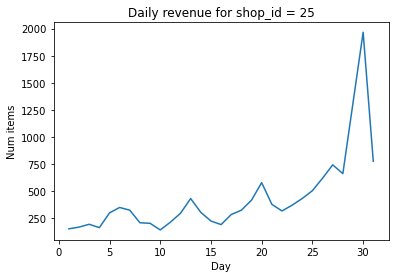

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [259]:
total_num_items_sold = transactions4.groupby('day').sum().reset_index().item_cnt_day.values  # YOUR CODE GOES HERE
days = sorted(pd.to_numeric(transactions4.day).unique()) # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = sum((total_num_items_sold - total_num_items_sold.mean())**2) / (len(total_num_items_sold) -1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [260]:
STUDENT_EMAIL = "A01638188@itesm.mx" # EMAIL HERE
STUDENT_TOKEN = "b9FD0Wx9qohpoBzw" # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [261]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)